# UFO Data Analysis

## Hypothesis

1. Since this is an American dataset, I assume most of the UFO sightings will be reported in the US. 
2. More sightings will be reported in areas with higher population density.
3. More sightings should occur at nighttime.
4. There should be more sightings in the more recent years as technology use is more prevalent.

In [1]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt

ufo_data = pd.read_csv("ufo_data.csv", error_bad_lines=False)

/home/bill/Documents/Vaccine-sentiment-dashboard/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\n

In [2]:
# Data cleaning
for col in ufo_data.columns:
    ufo_data[[col]] = ufo_data[[col]].replace('\W', '')
ufo_data

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0.0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.376944,-82.695833


<AxesSubplot:>

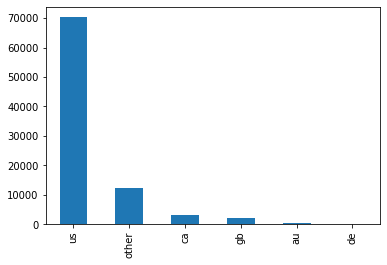

In [3]:
# Country
ufo_data[["country"]] = ufo_data[["country"]].fillna(value="other")
ufo_data["country"].value_counts().plot(kind='bar')

Most of the UFO reports come from the US, followed by Canada and UK. This makes sense given that the data is collected from an US-based website.

<AxesSubplot:>

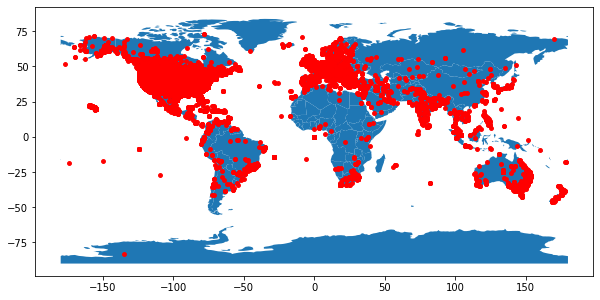

In [4]:
# Geolocation
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(ufo_data['longitude'].astype('float'), ufo_data['latitude'].astype('float'))]
gdf = gpd.GeoDataFrame(ufo_data, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

By showing all the reports on a world map, it appears that the highest concentration of reports are from North America and Europe. Because this is an English language website, it is somewhat expected.

<AxesSubplot:>

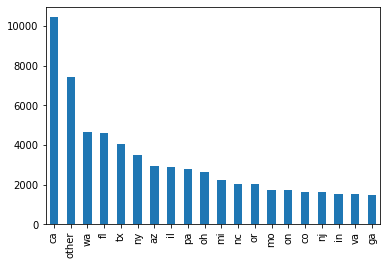

In [5]:
# State
ufo_data[["state"]] = ufo_data[["state"]].fillna(value="other")
ufo_data["state"].value_counts()[:20].plot(kind='bar')

Extending to the state level, it appears most reports come from populated states such as California, Florida, Texas, and New York, which is expected. However, there are less populated states such as Washington and Arizona on this list.

<AxesSubplot:>

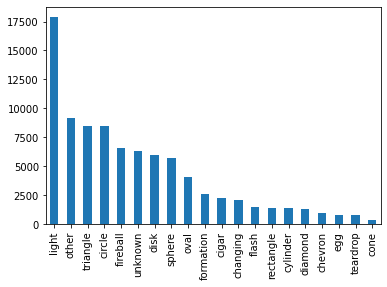

In [6]:
# Shape
ufo_data[["shape"]] = ufo_data[["shape"]].fillna(value="other")
ufo_data["shape"].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

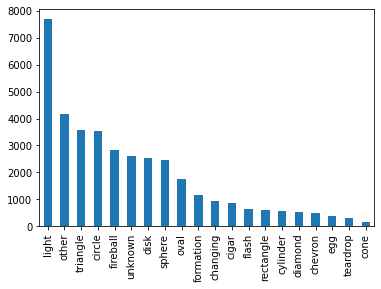

In [7]:
# States where weed is legal
states = ['ca', 'wa', 'co', 'ny', 'mi', 'ak', 'or', 'ma', 'me', 'il', 'az', 'nj', 'va', 'nm', 'ct']
ufo_weed = ufo_data[ufo_data['state'].isin(states)]
ufo_weed["shape"].value_counts()[:20].plot(kind='bar')

Because light is the most reported shape, I wanted to investigate whether there is a relationship between that and weed use.

<AxesSubplot:xlabel='datetime'>

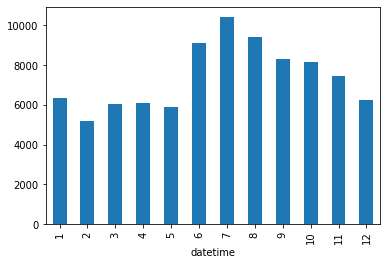

In [8]:
# Convert datetime object
ufo_data[['date', 'time']] = ufo_data['datetime'].str.split(expand=True)
ufo_data['datetime'] = (pd.to_datetime(ufo_data.pop('date'), format='%m/%d/%Y') + pd.to_timedelta(ufo_data.pop('time') + ':00'))
ufo_data['date posted'] = (pd.to_datetime(ufo_data.pop('date posted'), format='%m/%d/%Y'))


# Month
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.month).count().plot(kind="bar")

More reports seem to come from the summer months starting from June, and less in the winter months starting from December. This possibly correlates with more people being outdoors during these months.

<AxesSubplot:xlabel='datetime'>

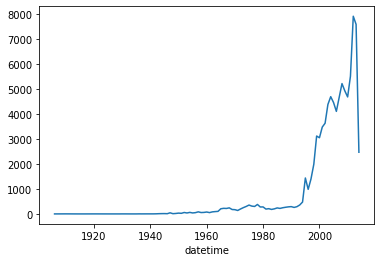

In [9]:
# Year sighted
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.year).count().plot(kind="line")

<AxesSubplot:xlabel='date posted'>

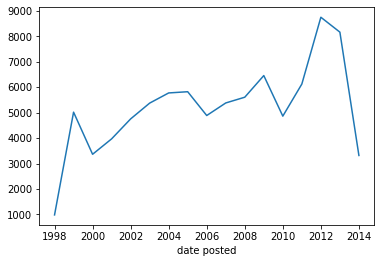

In [10]:
# Year posted
ufo_data["date posted"].groupby(ufo_data['date posted'].dt.year).count().plot(kind="line")

Text(0, 0.5, 'count')

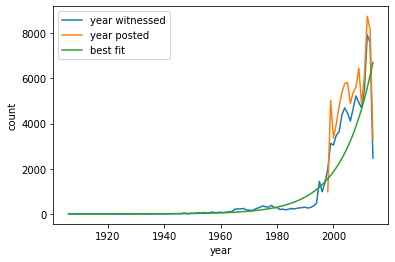

In [11]:
# Combined year graphs with best fit
import numpy as np

y = np.array(ufo_data['datetime'].groupby(ufo_data['datetime'].dt.year).count())
x = np.array(sorted(pd.unique(ufo_data['datetime'].dt.year)))
fit = np.polyfit(x, np.log(y), 1)
yfit = np.exp(x * fit[0]) * np.exp(fit[1])

plt.figure()
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.year).count().plot(kind="line")
ufo_data["date posted"].groupby(ufo_data['date posted'].dt.year).count().plot(kind="line")
plt.plot(x, yfit)
plt.legend(["year witnessed", "year posted", "best fit"])
plt.xlabel("year")
plt.ylabel("count")

It appears that most of the reports came in during the Internet era (late 1990s - present), with the number of reports generally increasing each year, close to an exponential growth. The sharp dropoff on the final year is due to incomplete data collection in the final year.

<AxesSubplot:xlabel='datetime'>

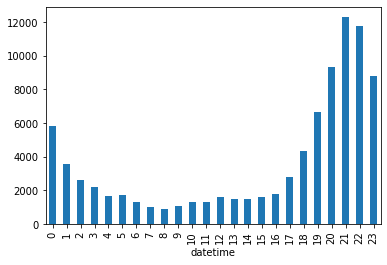

In [12]:
# Hour of the day
ufo_data['datetime'].groupby(ufo_data['datetime'].dt.hour).count().plot(kind="bar")

Not surprisingly, most reports come during the evening hours (18:00 and 0:00) when it's dark while most people are still awake.

In [13]:
# Perform chi-square test between hour and shape
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
shape_encoded = encoder.fit_transform(ufo_data['shape'])
hour = ufo_data['datetime'].dt.hour
hour = hour.to_numpy()
crosstab = pd.crosstab(shape_encoded, hour)
chi2_contingency(crosstab)

(6481.983750794898,
 0.0,
 644,
 array([[6.56186921e-02, 4.03928777e-02, 2.95785925e-02, 2.50228352e-02,
         1.91138827e-02, 1.96213309e-02, 1.49753606e-02, 1.16600323e-02,
         1.03406669e-02, 1.23479065e-02, 1.50091905e-02, 1.47272748e-02,
         1.80538797e-02, 1.69149404e-02, 1.66781312e-02, 1.79862200e-02,
         2.04106948e-02, 3.17549814e-02, 4.92450298e-02, 7.50459523e-02,
         1.05120716e-01, 1.38691235e-01, 1.32477813e-01, 9.92117638e-02],
        [1.40424001e+02, 8.64407582e+01, 6.32981878e+01, 5.35488673e+01,
         4.09037089e+01, 4.19896481e+01, 3.20472716e+01, 2.49524690e+01,
         2.21290272e+01, 2.64245199e+01, 3.21196676e+01, 3.15163680e+01,
         3.86353026e+01, 3.61979725e+01, 3.56912008e+01, 3.84905107e+01,
         4.36788868e+01, 6.79556603e+01, 1.05384364e+02, 1.60598338e+02,
         2.24958333e+02, 2.96799242e+02, 2.83502520e+02, 2.12313174e+02],
        [6.60780230e+01, 4.06756278e+01, 2.97856426e+01, 2.51979950e+01,
         1.924767

There appears to be a correlation between shape and hour observed, due to the p value being close to 0.

array([[<AxesSubplot:title={'center':'duration (seconds)'}>]],
      dtype=object)

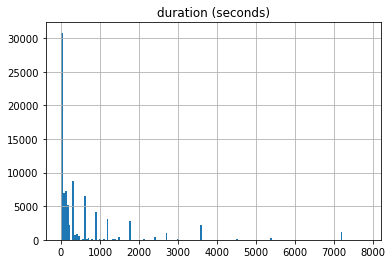

In [14]:
# Duration
ufo_data[['duration (seconds)']] = ufo_data[['duration (seconds)']].astype(float)
ufo_data = ufo_data[ufo_data['duration (seconds)'] < 8000]
ufo_data[['duration (seconds)']].hist(bins=160)

The duration of the sightings trend towards the shorter end (100 seconds or less).

## Conclusions

1. The times when most UFOs are observed correlate with when most people are out (warmer months, evenings).
2. The spacial distribution of UFO observations generally correlate with population, with emphasis on the US and other English-speaking countries since this is an American dataset.
3. There is generally an exponential increase in the number of UFO reports each year, which correlates with greater access to technology / Internet.
4. The most reported UFO shape is "light", and are very short in duration, which may be hallucinations from drug use, especially in less populated states where weed is legal (e.g. Washington)